# Signate Cup 2024 exp_1


# ライブラリのインポート

In [ ]:
%%bash
# pip uninstall lightgbm --yes
# pip install lightgbm \
#     --no-binary lightgbm \
#     --no-cache lightgbm \
#     --config-settings=cmake.define.USE_CUDA=ON

pip install catboost -qq
pip install seaborn_qqplot -qq
pip install japanize-matplotlib optuna mojimoji optuna pymysql -qq
pip install optuna -qq
pip install optuna-integration -qq
pip install category_encoders -qq
pip install skorch -qq
pip install shirokumas -qq
pip install shap -qq
pip install jaconv -qq
pip install hydra-core -qq
# pip install wandb -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import catboost
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import functools
import datetime
from dateutil.parser import parse
import japanize_matplotlib
import optuna
import mojimoji as mjmj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import category_encoders as ce
from pathlib import Path
import os
import re
import pickle
import math
from math import sqrt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
import skorch
from skorch import NeuralNetClassifier
import torch
from torch import nn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from skorch import NeuralNetClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import jaconv
import unicodedata
import hydra
# import wandb
import sys
from omegaconf import OmegaConf, DictConfig

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 生データのデータフレーム化

In [ ]:
import pandas as pd
base_path = "/content/drive/MyDrive/signate/signate_cup_2024"
row_tr_df = pd.read_csv(f"{base_path}/data/train.csv")
row_test_df = pd.read_csv(f"{base_path}/data/test.csv")
row_sample_df = pd.read_csv(f"{base_path}/data/sample_submit.csv", header=None)

tr_df = row_tr_df.copy()
test_df = row_test_df.copy()

for col in tr_df.keys():
    col_l = col.lower()
    tr_df.rename(columns={col: col_l}, inplace=True)
    test_df.rename(columns={col: col_l}, inplace=True)

tr_df_cp = tr_df.copy()
test_df_cp = test_df.copy()

# clean clumuns

In [ ]:
def to_half_width(s):
    if pd.isna(s):
        return s
    if not isinstance(s, (int, np.integer, float, np.floating)):
        s = jaconv.z2h(s, kana=True, digit=True, ascii=True)
    return s

def normalize_str(s):
    if pd.isna(s):
        return s
    if not isinstance(s, (int, np.integer, float, np.floating)):
        # 全角=>半角
        s =  unicodedata.normalize('NFKC', s)
        s = s.lower()
    return s




# # 漢数字をアラビア数字に変換する辞書と関数
# num_map = {
#     '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
#     '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,  '百': 100}

def kanji_to_int(s):
    # 漢数字をアラビア数字に変換する辞書と関数
    num_map = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,  '百': 100}

    tmp = re.search(r"(.*百)?(.*十)?(.*)?", s)
    tmp_lst = []

    for x in tmp.groups():
        if x:
            tmp_lst.append(x)
    num=0
    if len(tmp_lst) == 0:
        return s
    for x in tmp_lst:
        tmp_num = 0
        if "百" in x:
            x = x[:-1]
            if len(x) == 0:
                tmp_num = num_map["百"]
            else:
                tmp_num += num_map["百"] * num_map[x]

        elif "十" in x:
            x = x[:-1]
            if len(x) == 0:
                tmp_num = num_map["十"]
            else:
                tmp_num += num_map["十"] * num_map[x]
        else:
            tmp_num = num_map[x]


        num += tmp_num

    return num

# 「歳」や「才」、その他の不要な文字を削除して数値に変換
def clean_age(s):
    if pd.isna(s):
        return np.nan
    s = s[:-1]
    s = s.translate(str.maketrans('０１２３４５６７８９', '0123456789'))  # 全角→半角
    if s.isdigit():
        s = int(s)
        return s
    num = kanji_to_int(s)  # 漢数字→アラビア数字

    return num

# def clean_typeofcontact():

def clean_citytier(s):
    if pd.isna(s):
        return s
    else:
        s = str(s)
        return s


def clean_durationofpitch(s):
    if pd.isna(s):
        return s
    if s[-1] == "分":
        s = int(s[:-1]) * 60
    else:
        s = int(s[:-1])
    return s

# def clean_occupation()

def clean_gender(s):
    if pd.isna(s):
        return s
    s = s.lower()
    if s == "male":
        s = "male"
    else:
        s = "female"
    return s

# def numberofpersonvisiting()

# def numberoffollowups()

def clean_productpitched(inp_df):
    df = inp_df.copy()
    str_map = {}
    tmp_str = ['basic', 'basiς', 'basiс', 'basıc', 'basıς', 'basιc', 'baտic', 'baꓢic', 'bαsic', 'βasic',
            'βasiс', 'βasıc', 'вasic',  '𐊡asic', 'basιс', 'basιс', 'baѕic']
    for x in tmp_str:
        str_map[x] = "basic"
    tmp_str = ['deluxe', 'deluxε', 'delu×e', 'de|uxe', 'de|u×e', 'dεluxε', 'ᗞeluxe',  'ꭰeluxe', 'ꭰe|uxe']
    for x in tmp_str:
        str_map[x] = "deluxe"
    tmp_str = ['king', 'kiոg', 'kıng', 'kıոg']
    for x in tmp_str:
        str_map[x] = "king"
    tmp_str = ['standard', 'standarꭰ', 'stanᗞard', 'staոdard', 'ѕtandard', 'տtandard', 'ꓢtandard', 'stαndard']
    for x in tmp_str:
        str_map[x] = "standard"
    tmp_str = ['super deluxe', 'super de|uxe', 'super dεluxe', 'super ᗞeluxe',
            'super ꭰeluxe', 'ѕuper deluxe', 'տuper deluxe', 'ꓢuper deluxe', 'ꓢuper de|uxe', 'super delu×e', 'supεr ꭰeluxe']
    for x in tmp_str:
        str_map[x] = "super deluxe"

    df.productpitched = df.productpitched.apply(lambda x: str_map[x])

    return df

# def preferredpropertystar()

def clean_numberoftrips(s):
    if pd.isna(s):
        return s

    patterns = [
        (r'年に(\d+)回', lambda m: int(m.group(1))),
        (r'半年に(\d+)回', lambda m: int(m.group(1) * 2)),
        (r'四半期に(\d+)回', lambda m: int(m.group(1) * 4))
    ]

    # パターンに一致するものを処理
    for pattern, action in patterns:
        match = re.match(pattern, s)
        if match:
            s = action(match)
            return s

    s = int(s)
    return s

# def clean_passport

# def clean_pitchsatisfactionscore()

def clean_designation(inp_df):
    df = inp_df.copy()

    str_map = {}
    tmp_str = ['Executive', 'E×ecutive', 'Executiѵе', 'Еxecutivе', 'Еxecutive',
            'Exеcutivе', 'Exеcutive', 'Executivе', 'Executiѵe', 'Е×еcutive', 'Exеcutiѵе',
            'Еxеcutivе',  'Е×ecutive', 'E×еcutiѵe', 'executive', 'e×ecutive', 'executiѵе', 'еxecutivе', 'еxecutive',
            'exеcutivе', 'exеcutive', 'executivе', 'executiѵe', 'е×еcutive', 'exеcutiѵе', 'e×еcutiѵe', 'еxеcutivе', 'е×ecutive']
    for x in tmp_str:
        str_map[x] = "excective"

    tmp_str = ['Senior Manager', 'Sеnior Manager', 'Ѕenior Manager', 'Senior Managе𝙧', 'Senior Μanαger', 'Senior Manage𝙧',
            'Senio𝙧 Manager', 'Senior Managеr'  'Տenior Μanager'  'Senior Manαger', 'Senior Mαnαger', 'Ѕenior Manαger',
            'Sеnior Managеr' 'Տenior Manager', 'Senior Mαnager', 'senior manager', 'sеnior manager', 'ѕenior manager', 'senior μanαger', 'senior managеr',
            'տenior μanager', 'senior manαger', 'senior mαnαger', 'ѕenior manαger', 'sеnior managеr', 'տenior manager', 'senior mαnager', 'ѕenior μanager',
            'senior μanager']
    for x in tmp_str:
        str_map[x] = "senior manager"

    tmp_str = ['Manager', 'Μanager', 'Mαnage𝙧', 'Managеr', 'Manage𝙧' , 'Manαger', 'Μanage𝙧',
            'Manαgеr', 'Mαnager', 'Mαnagеr', 'Mαnαger' 'Μanagеr', 'manager', 'μanager', 'mαnager', 'managеr', 'manαger',  'manαgеr',
            'mαnαger', 'μanagеr', 'mαnagеr', 'μαnager', 'μαnagеr', 'mαnαgеr']
    for x in tmp_str:
        str_map[x] = "manager"

    tmp_str = ['AVP' , 'ΑVP', 'АVP', 'avp', 'αvp', 'аvp']
    for x in tmp_str:
        str_map[x] = "avp"

    tmp_str = ['VP', 'vp']
    for x in tmp_str:
        str_map[x] = "vp"

    df.designation = df.designation.apply(lambda x: str_map[x])

    return df

def clean_monthlyincome(s):
    if pd.isna(s):
        return s

    m = re.search(r'(月収)(\d+)', s)
    if m:
        s = int(m[2])
        s = s * 10000
        return s

    m = re.search(r'\d+', s)
    if m:
        # print(m[0])
        s = int(m[0])
        return s


def clean_customer_info(inp_df):
    df = inp_df.copy()
    df['is_married'] = df['customer_info'].apply(lambda x: 1 if re.search(r'結婚済み', x) else 0)
    # 車所有フラグを作成
    df['has_car'] = df['customer_info'].apply(lambda x: 1 if re.search(r'車所持|自動車所持', x) else 0)
    # 子持ちフラグを作成
    df['has_child'] = df['customer_info'].apply(lambda x: 1 if re.search(r'子供1人|こども1人', x) else 0)

    return df


In [ ]:
def check_na(inp_df):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            n_nan= df[col].isna().sum()
            print(f"NaNは{n_nan}個あります。")
        else:
            print("NaNなし")
        print("------------------\n")


def check_and_clean_na(inp_df, fill_na=False):
    df = inp_df.copy()
    for col in df.keys():
        global tmp_df
        print(col)
        tmp_lst = list(df[col].unique())
        tmp_df = pd.DataFrame(tmp_lst)

        if tmp_df.isna().any()[0]:
            print("NaNあり")
            if fill_na:
                if isinstance(df[col][0], str):
                    print("=====================================================")
                    df[col] = df[col].fillna(df[col].mode()[0])
                else:
                    df[col] = df[col].fillna(df[col].mean())
            else:
                df = df.dropna(subset=[col])
        else:
            print("NaNなし")
        print("------------------\n")

    return df

In [ ]:
tr_df = tr_df_cp.copy()
test_df = test_df_cp.copy()

for col in tr_df:
    tr_df[col] = tr_df[col].apply(to_half_width).apply(normalize_str)
for col in test_df:
    test_df[col] = test_df[col].apply(to_half_width).apply(normalize_str)


fnc_lst = [clean_age, clean_citytier, clean_durationofpitch, clean_gender, clean_numberoftrips,
           clean_monthlyincome]
col_lst = ["age", "citytier", "durationofpitch", "gender", "numberoftrips",
           "monthlyincome"]

for col, fnc in zip(col_lst, fnc_lst):
    tr_df[col] = tr_df[col].apply(fnc)
    test_df[col] = test_df[col].apply(fnc)

tr_df = clean_customer_info(tr_df)
test_df = clean_customer_info(test_df)
tr_df = clean_productpitched(tr_df)
test_df = clean_productpitched(test_df)
tr_df = clean_designation(tr_df)
test_df = clean_designation(test_df)
tr_df = check_and_clean_na(tr_df).reset_index(drop=True)
test_df = check_and_clean_na(test_df, fill_na=True).reset_index(drop=True)

id
NaNなし
------------------

age
NaNあり
------------------

typeofcontact
NaNあり
------------------

citytier
NaNなし
------------------

durationofpitch
NaNあり
------------------

occupation
NaNなし
------------------

gender
NaNなし
------------------

numberofpersonvisiting
NaNなし
------------------

numberoffollowups
NaNあり
------------------

productpitched
NaNなし
------------------

preferredpropertystar
NaNなし
------------------

numberoftrips
NaNあり
------------------

passport
NaNなし
------------------

pitchsatisfactionscore
NaNなし
------------------

designation
NaNなし
------------------

monthlyincome
NaNあり
------------------

customer_info
NaNなし
------------------

prodtaken
NaNなし
------------------

is_married
NaNなし
------------------

has_car
NaNなし
------------------

has_child
NaNなし
------------------

id
NaNなし
------------------

age
NaNあり
------------------

typeofcontact
NaNあり
------------------

citytier
NaNなし
------------------

durationofpitch
NaNあり
------------------

occupation


In [ ]:
for col in tr_df.select_dtypes(include='object').columns:
    tr_df[col] = tr_df[col].astype('category')

for col in test_df.select_dtypes(include='object').columns:
    test_df[col] = test_df[col].astype('category')


# データの可視化

In [ ]:
def get_binned_data(x, col, bins=10, label_format='{:02}_{:.0f}-{:.0f}'):

    # データ型チェック
    if type(x) not in (pd.Series, pd.DataFrame):
        x = pd.Series(x)

    if x.isnull().values.any():
        print(col)
        print(x.unique())
        raise ValueError(f"{col}にNaNが含まれています。NaNを削除してください。")

    uniq_type = type(x[0])

    # ラベルが文字型の場合
    if uniq_type is str:
        binned_x = x
        return binned_x, "notbinned"

    # ラベルが数字でunique数が10未満の場合は、文字型に変換する
    if len(x.unique()) < 6:
        binned_x = pd.Series([str(val) for val in x])
        return binned_x, "notbinned"
    else:
        if type(bins) is int:
            binned_value, bin_def = pd.qcut(x, bins, retbins=True, duplicates='drop')
        else:
            bin_def = bins


        labels = [label_format.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]

        if type(bins) is int:
            binned_x = pd.qcut(x, bins, labels=labels, duplicates='drop')
        else:
            binned_x = pd.cut(x, bins, labels=labels)

        binned_x = pd.Series([str(val) for val in binned_x])

        return binned_x, "binned"

def meta_subplots(row_num, col_num=3):
    dpi = 100
    fig_x = 10
    fig_y = 8

    if row_num * col_num == 1:
        dpi = 70
        fig_x = 5
        fig_y = 5

    if row_num * col_num == 1:
        dpi = dpi
        fig_x = fig_x
        fig_y = fig_y
    elif row_num * col_num <= 3:
        dpi = dpi*1.25
        fig_x = fig_x*1.25
        fig_y = fig_y*1.25

    elif row_num * col_num <= 6:
        dpi = dpi*1.5
        fig_x = fig_x*1.5
        fig_y = fig_y*1.5

    elif row_num * col_num <= 9:
        dpi = dpi*1.75
        fig_x = fig_x*1.75
        fig_y = fig_y*1.75

    elif row_num * col_num <= 12:
        dpi = dpi*2
        fig_x = fig_x*2
        fig_y = fig_y*2


    fig, axes = plt.subplots(row_num, col_num ,dpi = dpi,
    facecolor = "white",
    edgecolor = "black",
    linewidth= 15,
    figsize=(fig_x, fig_y))
    return fig, axes

def cnvrt_hist(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_df=False, show_fig=True):
    bin_values = {}
    notbinned_cols = []
    binned_cols = []
    tr_df_cp = tr_df.copy()
    test_df_cp = test_df.copy()

    id_lst = list(tr_df_cp.id.values)
    id_lst += list(test_df_cp.id.values)
    id_lst = sorted(id_lst)
    add_binned_df = pd.DataFrame(id_lst, columns=["id"])
    fig, axes = meta_subplots(row_num, col_num)
    if row_num * col_num > 1:
        axes = axes.flatten()
    if len(trgt_cols) > 0:
        cols = trgt_cols.copy()
    else:
        cols = tr_df.columns

    if "id" in cols:
        cols = [col for col in cols if col != "id"]

    for i, col in enumerate(cols):
        plot_map = {}
        if i == len(cols):
            break;
        if col == trgt_y:
            continue;
        # ビン分割
        tr_endid = tr_df_cp.index[-1]
        all_df = pd.concat([tr_df_cp, test_df_cp], ignore_index=True)
        all_values = all_df[col]
        all_binned_values, is_binned = get_binned_data(all_values, col, bins)
        if is_binned == "binned":
            print(col)
            binned_cols.append(col)
            add_binned_df[[f"binned_{col}"]] = all_binned_values
        all_df[f"binned_{col}"] = all_binned_values.values
        tr_binned_values = all_binned_values[:tr_endid+1]
        test_binned_values = all_binned_values[tr_endid+1:]
        tr_plot_data = tr_binned_values.value_counts() / tr_df_cp.shape[0]
        tr_plot_data = tr_plot_data.to_dict()
        tr_plot_data = sorted(tr_plot_data.items())
        tr_plot_data = pd.DataFrame(tr_plot_data, columns=[f"binned_{col}", "train_val_rate"])
        tr_plot_data = tr_plot_data.set_index(f"binned_{col}")
        test_plot_data = test_binned_values.value_counts() / test_df_cp.shape[0]
        test_plot_data = test_plot_data.to_dict()
        test_plot_data = sorted(test_plot_data.items())
        test_plot_data = pd.DataFrame(test_plot_data, columns=[f"binned_{col}", "test_val_rate"])
        test_plot_data = test_plot_data.set_index(f"binned_{col}")
        tr_plot_data = tr_plot_data.fillna(0)
        test_plot_data = test_plot_data.fillna(0)
        if col != trgt_y:
            tmp_df = all_df[[col, f"binned_{col}"]].copy()
            y_rate_df = all_df[[col, trgt_y, f"binned_{col}"]][:tr_endid+1].copy()
            y_rate_df[trgt_y] = y_rate_df[trgt_y].apply(lambda x: int(x) if not pd.isna(x) else x)
            # .loc[: trgt]で置換すると強制的にcategory型になる！！！
            y_rate_df[trgt_y] = y_rate_df[trgt_y].astype('float64')
            y_rate_df = y_rate_df.groupby(f"binned_{col}")[trgt_y].mean().reset_index()
            y_rate_df.rename(columns={f"{trgt_y}": f"{trgt_y}_rate"}, inplace=True)
            y_rate_df.set_index(f"binned_{col}", inplace=True)
            tr_plot_data = pd.merge(tr_plot_data, y_rate_df, left_index=True, right_index=True, how='left')
            tr_plot_data[f"{trgt_y}_rate"] = tr_plot_data[f"{trgt_y}_rate"].fillna(0)
        w = 0.4
        x_axis_labels = [i for i in range(len(tr_plot_data.index.tolist()))]
        if row_num * col_num > 1:
            ax = axes[i]
        else:
            ax = axes
        ax_tr_dict = tr_plot_data[["train_val_rate"]].to_dict()["train_val_rate"]
        ax_test_dict = test_plot_data[["test_val_rate"]].to_dict()["test_val_rate"]
        ax2_tr_dict = tr_plot_data[[f"{trgt_y}_rate"]].to_dict()[f"{trgt_y}_rate"]
        ax.bar(x_axis_labels, ax_tr_dict.values(), width=w, color='red')
        plt_test_x = test_plot_data.index.tolist()
        tmp_plt_test_x = [i for i in range(len(plt_test_x))]
        tmp_plt_test_x = [int(x)+ w for x in tmp_plt_test_x]
        ax.bar(tmp_plt_test_x, ax_test_dict.values(), width=w, color='blue')
        plot_label_x = list(ax_tr_dict.keys())
        tmp_plot_label_x = [i for i in range(len(plot_label_x))]
        tmp_plot_label_x = [int(x)+ w/2 for x in tmp_plot_label_x]
        bin_values[col] = plot_label_x
        ax.set_xticks(tmp_plot_label_x)
        ax.set_xticklabels(plot_label_x, rotation=30)
        ax.xaxis.set_tick_params(direction='out', labelsize=7, width=3, pad=3)
        upper_y = test_plot_data["test_val_rate"].max() + 0.1
        ax.set_ylim([0, upper_y])
        ax.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        ax.set_xlabel(f"{col}", fontsize=7.5)
        ax.axes.xaxis.set_ticklabels([])
        ax2 = ax.twinx()
        ax2.plot(x_axis_labels, ax2_tr_dict.values(), marker='o', color='g')
        ax2.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        upper_y =tr_plot_data[f"{trgt_y}_rate"].max() + 0.1
        ax2.set_ylim([0, upper_y])
        ax2.set_ylabel("")
    fig.suptitle("Train_Test_Hist", fontsize=7.5, y=0.95)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.3, hspace=0.35)
    if row_num * col_num > 1:
        for i in range(len(cols), len(axes.flatten())):
                fig.delaxes(axes.flatten()[i])
    if not show_fig:
        plt.close(fig)
    if return_df:
        if len(binned_cols) > 0:
            tr_df = pd.merge(tr_df, add_binned_df, on="id", how="left")
            test_df = pd.merge(test_df, add_binned_df, on="id", how="left")
        return tr_df, test_df, bin_values
    else:
        return bin_values

<ipython-input-9-8d9e08a7e344>:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_rate_df = y_rate_df.groupby(f"binned_{col}")[trgt_y].mean().reset_index()
<ipython-input-9-8d9e08a7e344>:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_rate_df = y_rate_df.groupby(f"binned_{col}")[trgt_y].mean().reset_index()
<ipython-input-9-8d9e08a7e344>:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_rate_df = y_rate_df.grou

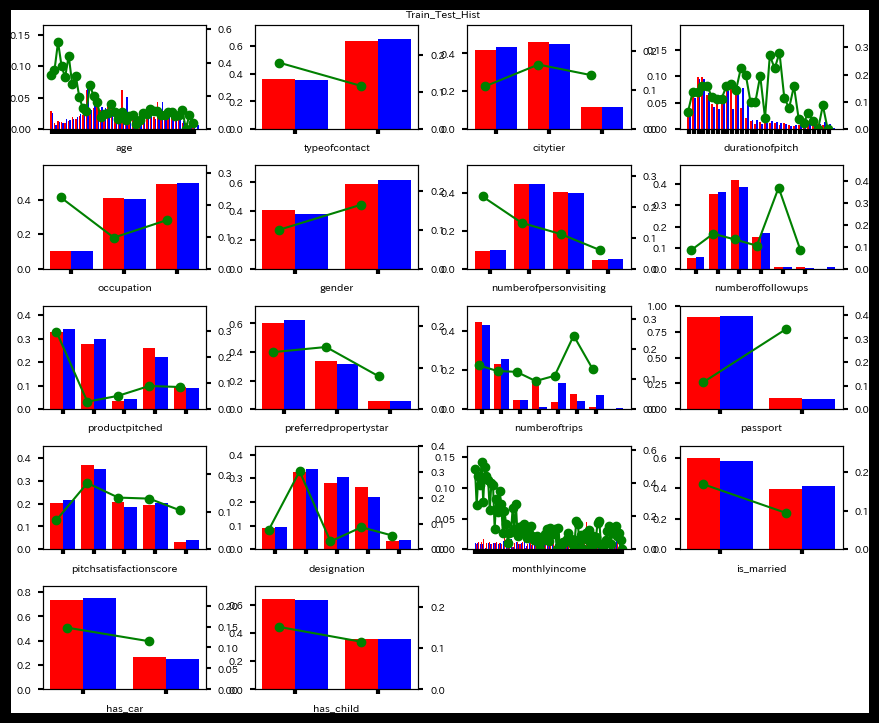

In [ ]:
trgt_y = 'prodtaken'
trgt_cols = [
    'age', 'typeofcontact', 'citytier', 'durationofpitch',
    'occupation', 'gender', 'numberofpersonvisiting', 'numberoffollowups',
    'productpitched', 'preferredpropertystar', 'numberoftrips', 'passport',
    'pitchsatisfactionscore', 'designation', 'monthlyincome',
    'is_married', 'has_car', 'has_child']

bin_values = cnvrt_hist_encd(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_cols, row_num=5, col_num=4, bins=100, return_df=False)

In [ ]:
drop_cols = ["customer_info"]
tr_df.drop(drop_cols, axis=1, inplace=True)
test_df.drop(drop_cols, axis=1, inplace=True)

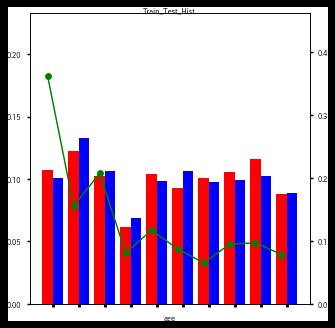

In [ ]:
trgt_y = 'prodtaken'
trgt_col = ["age"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=10, return_df=True)

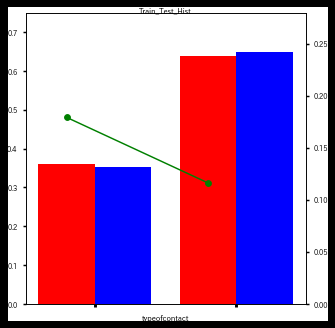

In [ ]:
trgt_col = ["typeofcontact"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

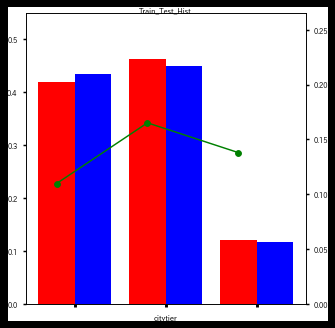

In [ ]:
trgt_col = ["citytier"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

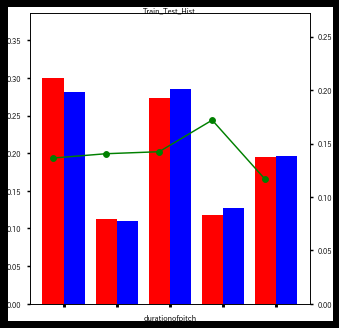

In [ ]:
trgt_col = ["durationofpitch"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

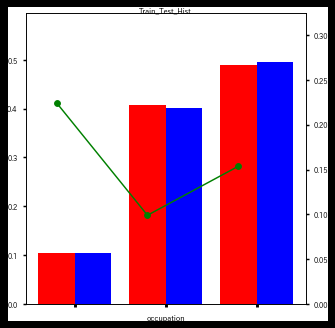

In [ ]:
trgt_col = ["occupation"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

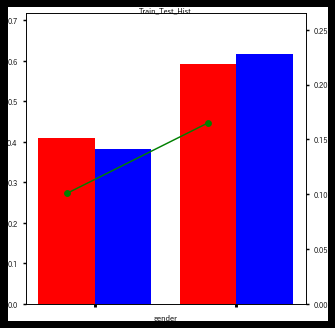

In [ ]:
trgt_col = ["gender"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

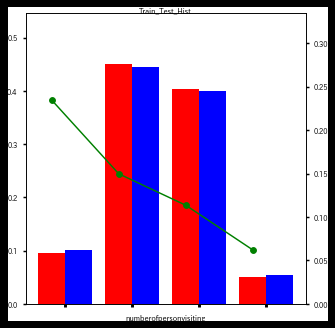

In [ ]:
trgt_col = ["numberofpersonvisiting"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

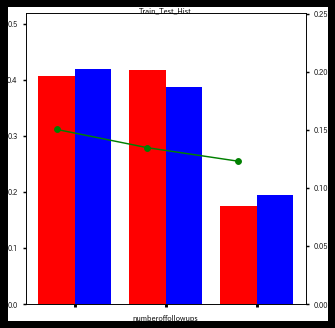

In [ ]:
trgt_col = ["numberoffollowups"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

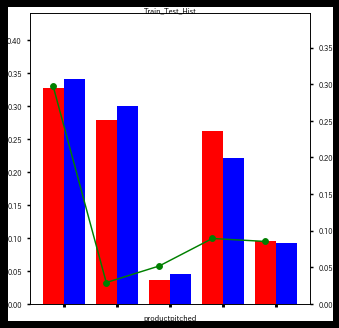

In [ ]:
trgt_col = ["productpitched"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

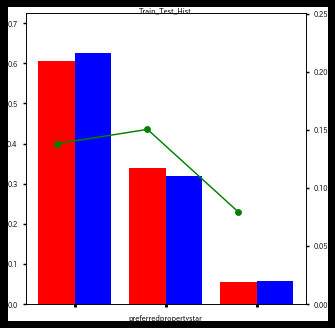

In [ ]:
trgt_col = ["preferredpropertystar"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

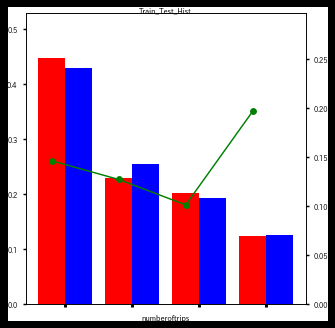

In [ ]:
trgt_col = ["numberoftrips"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

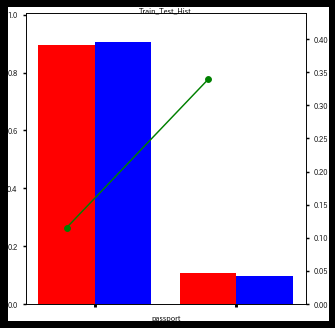

In [ ]:
trgt_col = ["passport"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

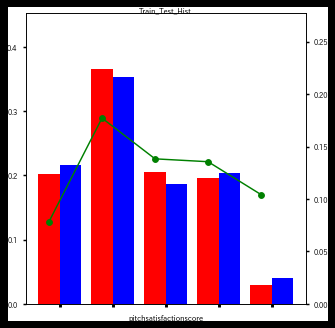

In [ ]:
trgt_col = ["pitchsatisfactionscore"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

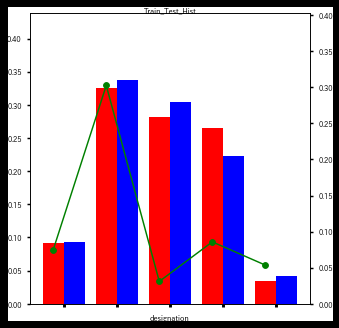

In [ ]:
trgt_col = ["designation"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

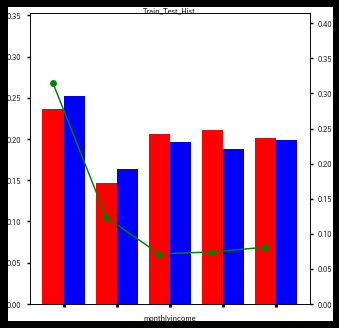

In [ ]:
trgt_col = ["monthlyincome"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

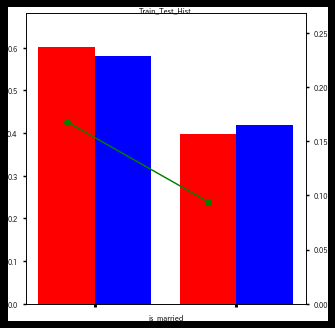

In [ ]:
trgt_col = ["is_married"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

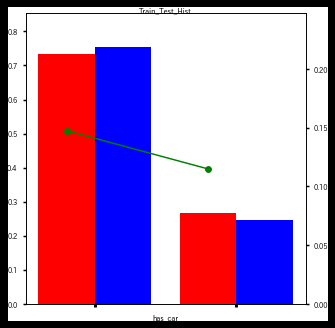

In [ ]:
trgt_col = ["has_car"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

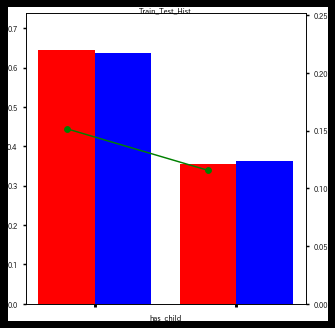

In [ ]:
trgt_col = ["has_child"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

# 集約特徴量

In [ ]:
_del_cols = ["typeofcontact", "citytier", "occupation", "gender", "numberofpersonvisiting",
            "numberoffollowups", "productpitched", "preferredpropertystar",
            "numberoftrips", "passport", "pitchsatisfactionscore", "designation",
            "is_married", "has_car", "has_child"]

del_cols = []

for col in _del_cols:
    col = f"binned_{col}"
    del_cols.append(col)
_tr_df = _tr_df.drop(del_cols, axis=1)
_test_df = _test_df.drop(del_cols, axis=1)

In [ ]:
cate_cols = ["numberofpersonvisiting", "numberoffollowups", "preferredpropertystar",
             "numberoftrips", "passport", "pitchsatisfactionscore",
             "prodtaken", "is_married", "has_car", "has_child"]

def cnvrt_cate(df, cate_cols):
    for col in df.columns:
        if col in cate_cols:
            df = df.astype({f"{col}": "category"})
        else:
            pass
    return df


_tr_df = cnvrt_cate(_tr_df, cate_cols)
_test_df = cnvrt_cate(_test_df, cate_cols)

def cnvrt_cate(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")
        else:
            pass
    return df

_tr_df = cnvrt_cate(_tr_df)
_test_df = cnvrt_cate(_test_df)

In [ ]:
def make_agg_feats(inp_df):
    df = inp_df.copy()
    grby_cols = df.columns
    trgt_cols = df.columns
    grby_cols = [col for col in grby_cols if col not in ["id", "prodtaken"]]
    trgt_cols = [col for col in trgt_cols if col not in ["id", "prodtaken"]]

    for grby_col in grby_cols:
        if df[grby_col].dtype == "category":
            for trgt_col in trgt_cols:
                if trgt_col in ["passport", "is_marrie", "has_car", "has_child", f"{grby_col}"]:
                    continue;

                if df[trgt_col].dtype == "category":
                    tmp_df = df.groupby(df[grby_col], observed=False)[f"{trgt_col}"].apply(lambda x: x.mode()[0])
                    tmp_df = tmp_df.rename(f"grby_{grby_col}_mode_{trgt_col}")

                if df[trgt_col].dtype in ["int64", "float64"]:
                    tmp_df = df.groupby(f"{grby_col}", observed=False)[f"{trgt_col}"].apply(lambda x: x.mean())
                    tmp_df = tmp_df.rename(f"grby_{grby_col}_mean_{trgt_col}")

                df = pd.merge(df, tmp_df, left_on=[f"{grby_col}"], right_index=True, how='left')
    return df

_tr_df_2 = make_agg_feats(_tr_df)
_test_df_2 = make_agg_feats(_test_df)

# pythonファイルで実行

In [ ]:
# xgb_singleでs_n_trials: 1000, epochs: 1000
# exp_id = 1
# run_id = 1
! python3 /content/drive/MyDrive/signate/signate_cup_2024/utility/main.py 1

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/////  single model 訓練中... //////
xgbclsf を使用しています...
	optimal hyperparameters using Optuna　探索中...
///// now... single_only //////
///// search for xgbclsf /////
[I 2025-01-15 06:13:01,287] A new study created in RDB with name: study_ens_single_only_xgbclsf

◎ single_only_xgbclsf_GLOBAL_TRIAL_1 strat...
[I 2025-01-15 06:13:01,366] A new study created in memory with name: no-name-1a03059d-6989-4fdd-aed7-3412ae2572be
[I 2025-01-15 06:13:01,367] A new study created in memory with name: no-name-53d0e415-db15-4804-98e6-29b1d172b47e
[I 2025-01-15 06:13:01,367] A new study created in memory with name: no-name-cce81a57-ee8b-4372-8f0e-bf1faccbcdd6
[I 2025-01-15 06:13:01,367] A new 

In [ ]:
base_path = Path('/content/drive/MyDrive/signate/signate_cup_2024')
exp_id = 1
run_id = 8

with open(base_path / f"output/exp/exp_{exp_id}/run_{run_id}/tr_df.pickle", 'rb') as f:
    tr_df = pickle.load(f)

# base_path = Path('/content/drive/MyDrive/signate/beginner_no52')
with open(base_path / f"output/exp/exp_{exp_id}/run_{run_id}/test_df.pickle", 'rb') as f:
    test_df = pickle.load(f)

# base_path = Path('/content/drive/MyDrive/signate/beginner_no52')
with open(base_path / f"output/exp/exp_{exp_id}/run_{run_id}/output_path.pickle", 'rb') as f:
    output_path = pickle.load(f)

AUC:  0.9782435121617717


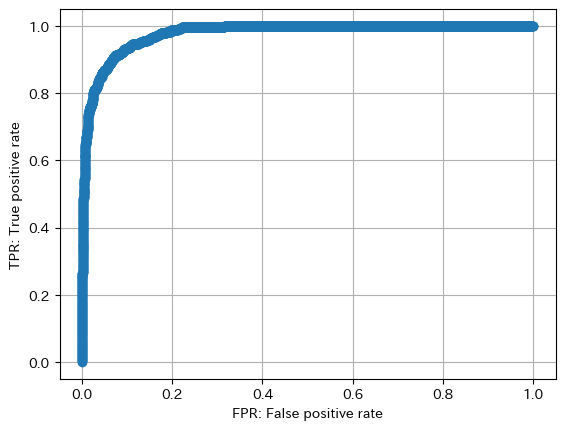

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

trgt_y = "prodtaken"

def plot_roc(meta_tr_df, meta_test_df, trgt_y):
    y_true = meta_tr_df[f"{trgt_y}"]
    y_score = meta_tr_df[f"{trgt_y}_pred_proba"]
    auc_score = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.grid()

    return auc_score
auc_score = plot_roc(tr_df, test_df, trgt_y)
print("AUC: ", auc_score )

In [ ]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df, threshold):
    submit_df = row_sample_df.copy()
    exam_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d)", str(output_path))[0]
    df = trgt_df[["id", f"{trgt_y}_pred_proba"]]
    save_path = output_path / f"submit_exam_{exam_id}_{run_id}_th_{threshold}.csv"
    submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    if threshold:
        submit_df[1] = submit_df[1].apply(lambda x: 0 if x < threshold else 1)
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=None)
    return submit_df


trgt_y = "prodtaken"
save_submit(output_path, test_df, trgt_y, row_sample_df, None)

,0,1
0,3489,0.065571
1,3490,0.204412
2,3491,0.327411
3,3492,0.483915
4,3493,0.083489
...,...,...
3484,6973,0.094378
3485,6974,0.012072
3486,6975,0.563252
3487,6976,0.217034
